# PyCon IT Stats

In [1]:
import json
import matplotlib.pyplot as plt
import pandas as pd
from pathlib import Path

In [2]:
def load_data(year) -> list[str]:
    """
    Load the JSON data for a given year, filter for paid orders, 
    and extract the attendee emails for ticket items.
    """
    data = json.loads(Path(f"./PyConIT {year} data.json").read_text())
    orders = [order for order in data["event"]["orders"] if order["status"] == "p"]
    ticket_ids = [item["id"] for item in data["event"]["items"] if "ticket" in item["name"].lower()]
    ticket_positions = [p for order in orders for p in order["positions"] if p["item"] in ticket_ids]
    return [p["attendee_email"] for p in ticket_positions]

In [3]:
# Load the data for each year
pycon_2024 = load_data(2024)
pycon_2023 = load_data(2023)
pycon_2022 = load_data(2022)

len(pycon_2024), len(pycon_2023), len(pycon_2022)

(675, 814, 833)

In [4]:
new_2024_vs_2023 = len(set(pycon_2024) - set(pycon_2023))
new_2024_vs_2022 = len(set(pycon_2024) - set(pycon_2022))
new_2023_vs_2022 = len(set(pycon_2023) - set(pycon_2022))

new_2024_vs_2023, new_2024_vs_2022, new_2023_vs_2022, 

(640, 625, 696)

In [5]:
new_ever = len(set(pycon_2024)  - set(pycon_2023) - set(pycon_2022))
new_ever

593

In [6]:
# %%
data_summary = {
    'Year': [2022, 2023, 2024],
    'Attendees': [len(pycon_2022), len(pycon_2023), len(pycon_2024)],
}

df_summary = pd.DataFrame(data_summary)
df_summary.set_index('Year', inplace=True)
df_summary


,Attendees
Year,
2022,675
2023,814
2024,833


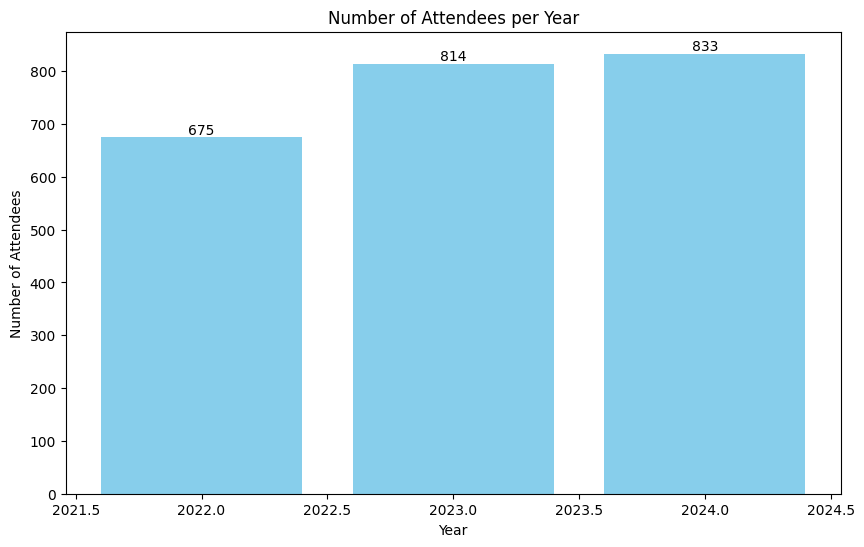

In [7]:
# Plot attendees per year
plt.figure(figsize=(10, 6))
bars = plt.bar(df_summary.index, df_summary['Attendees'], color='skyblue')
plt.title('Number of Attendees per Year')
plt.xlabel('Year')
plt.ylabel('Number of Attendees')
plt.xticks(rotation=0)
plt.bar_label(bars)
plt.show()
